In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
train_file = open('../input/train.csv', 'r') 
test_file = open('../input/test.csv', 'r')
train_df = pd.read_csv(train_file, index_col='PassengerId')
test_df = pd.read_csv(test_file, index_col='PassengerId')
label = train_df.Survived
combine = train_df.drop('Survived', axis=1).append(test_df)

In [31]:
train_df.info()
print '----------------------------------'
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), i

In [33]:
#Age
meanAge = combine.Age.dropna().mean()
stdAge = combine.Age.dropna().std()
randAge = np.random.randint(meanAge - stdAge, meanAge + stdAge, combine.Age.isnull().sum())
combine['Age'][combine.Age.isnull()] = randAge

/usr/local/Anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [7]:
#Fare
FareMean = combine[['Pclass', 'Fare']].groupby('Pclass').mean().Fare
combine.ix[combine.Fare.isnull(), 'Fare'] = FareMean[combine.ix[combine.Fare.isnull(), 'Pclass'].values].values

In [5]:
#name
title = combine.Name.map(lambda name: name.split(',')[1].split('.')[0])
combine = combine.join(pd.get_dummies(title))

In [6]:
combine['FirstName'] = combine.Name.map(lambda n : n.split(',')[0])

In [8]:
import math
combine['FareType'] = pd.DataFrame(combine.Fare.map(lambda f : math.ceil(f / 10) * 10))


In [9]:
familyGroup = combine.groupby([ 'FirstName', 'Fare']).count()['Pclass']
def familyCount(person):
    return familyGroup.ix[(person.FirstName, person.Fare)]
combine['Family'] = combine.apply(familyCount, axis=1)

In [10]:
combine.drop(['Name', 'FirstName'], axis=1, inplace=True)

In [11]:
#Sex
combine = combine.join(pd.get_dummies(combine.Sex, prefix='Sex'))
combine['Child'] = combine.apply(lambda x : 1 if x.Age < 16 else 0, axis=1)

In [13]:
combine.Age.isnull().sum()

0

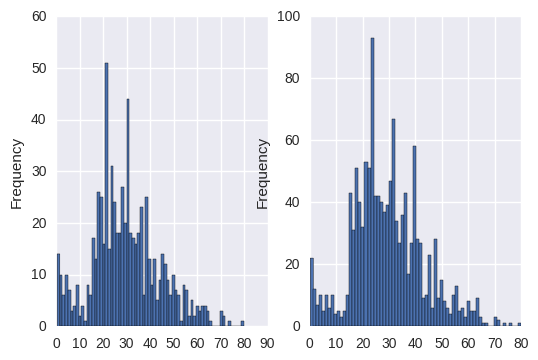

In [14]:
f, ax = plt.subplots(1, 2)
train_df.Age.plot(kind='hist', bins=70, ax=ax[0])
combine.Age.plot(kind='hist', bins=70, ax=ax[1])

In [15]:
combine['FamilySize'] = combine.Parch + combine.SibSp 
#sns.countplot(x='Survived', hue='Title', data=train_df)

combine.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [16]:
#Ticket
def tkt(t):
    arr =  t.replace('.', '').replace('/', '').split(' ')
    return arr[0] if len(arr) > 1 else 'NUM'
combine = combine.join(pd.get_dummies(combine.Ticket.map(tkt), prefix='Ticket'))

In [17]:
#Cabin
combine = combine.join(pd.get_dummies(combine.Cabin.fillna('U').map(lambda c : c[0]), prefix='Cabin'))

In [18]:
#Embark
combine.Embarked = combine.Embarked.fillna('S')
combine = combine.join(pd.get_dummies(combine.Embarked, prefix='Embarked'))

In [19]:
#Drop
combine.drop(['Sex', 'Embarked', 'Ticket', 'Cabin'], axis=1, inplace=1)

In [20]:
train_x = combine.iloc[:891]
train_y = label

test_x = combine.iloc[891:]

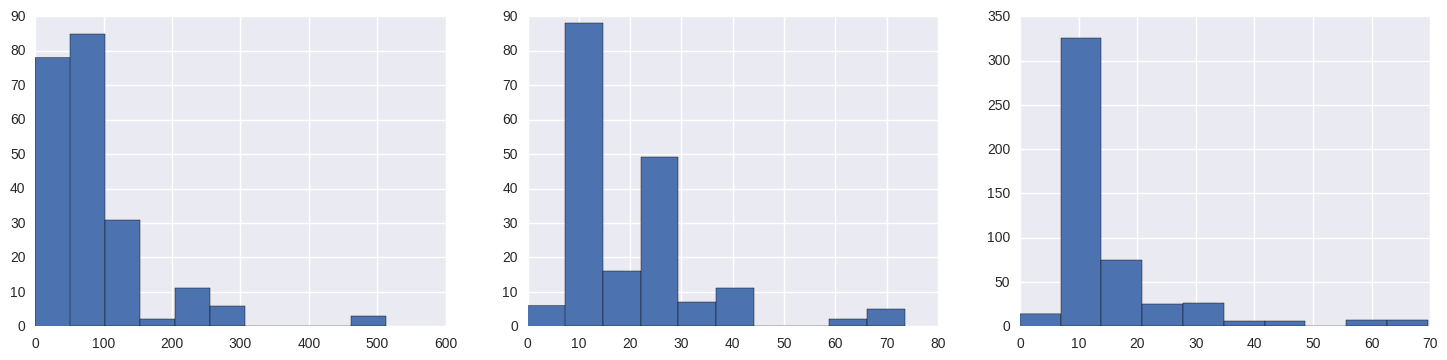

In [21]:
fg, ax = plt.subplots(1, 3, figsize=(18, 4))
train_df.ix[train_df.Pclass == 1, 'Fare'].hist(ax=ax[0])
train_df.ix[train_df.Pclass == 2, 'Fare'].hist(ax=ax[1])
train_df.ix[train_df.Pclass == 3, 'Fare'].hist(ax=ax[2])

In [22]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 75 columns):
Pclass            1309 non-null int64
Age               1309 non-null float64
Fare              1309 non-null float64
 Capt             1309 non-null float64
 Col              1309 non-null float64
 Don              1309 non-null float64
 Dona             1309 non-null float64
 Dr               1309 non-null float64
 Jonkheer         1309 non-null float64
 Lady             1309 non-null float64
 Major            1309 non-null float64
 Master           1309 non-null float64
 Miss             1309 non-null float64
 Mlle             1309 non-null float64
 Mme              1309 non-null float64
 Mr               1309 non-null float64
 Mrs              1309 non-null float64
 Ms               1309 non-null float64
 Rev              1309 non-null float64
 Sir              1309 non-null float64
 the Countess     1309 non-null float64
FareType          1309 non-null float64
Family         

In [23]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model = RandomForestClassifier(n_estimators=500)
model = model.fit(train_x, train_y)

In [24]:
pd.DataFrame(zip(train_x.columns, model.feature_importances_)).sort_values(by=1, ascending=False)

,0,1
1,Age,0.192969
2,Fare,0.142366
24,Sex_male,0.084881
23,Sex_female,0.081394
15,Mr,0.078689
21,FareType,0.053117
22,Family,0.051115
0,Pclass,0.048677
26,FamilySize,0.047525
71,Cabin_U,0.026388


In [25]:
from sklearn.feature_selection import SelectFromModel

m = SelectFromModel(model, prefit=True, threshold=0.01)
train_new = m.transform(train_x)
train_new.shape

(891, 16)

In [26]:
test_new = m.transform(test_x)
test_new.shape

(418, 16)

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [28]:
gbdt = GradientBoostingClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,10,15, 20],
                 'n_estimators': [1000, 2000, 5000, 8000],
                 'learning_rate' : [0.001, 0.01]
                 }

cross_validation = StratifiedKFold(train_y, n_folds=5)

gbdt_search = RandomizedSearchCV(gbdt, param_distributions=parameter_grid, n_jobs=7, cv=cross_validation)

gbdt_search.fit(train_new, train_y)

print('Best score: {}'.format(gbdt_search.best_score_))
print('Best parameters: {}'.format(gbdt_search.best_params_))

Best score: 0.83164983165
Best parameters: {'n_estimators': 5000, 'learning_rate': 0.001, 'max_depth': 4}


In [31]:
rf = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,10,15, 20],
                 'n_estimators': [2000, 5000, 8000],
                 'criterion' : ['gini', 'entropy']
                 }

cross_validation = StratifiedKFold(train_y, n_folds=5)

rf_search = RandomizedSearchCV(rf, param_distributions=parameter_grid, n_jobs=7, cv=cross_validation)

rf_search.fit(train_new, train_y)

print('Best score: {}'.format(rf_search.best_score_))
print('Best parameters: {}'.format(rf_search.best_params_))


KeyboardInterrupt



In [ ]:
from sklearn.svm import SVC

svc= SVC()

parameter_grid = {
                 'kernel' : ['rbf', 'linear']
                 }

cross_validation = StratifiedKFold(train_y, n_folds=5)

svc_search = GridSearchCV(svc, param_grid=parameter_grid, n_jobs=7, cv=cross_validation)

svc_search.fit(train_new, train_y)

print('Best score: {}'.format(svc_search.best_score_))
print('Best parameters: {}'.format(svc_search.best_params_))

KeyboardInterrupt: 

In [ ]:
predict = np.array([rf_search.predict(test_new), gbdt_search.predict(test_new), svc_search.predict(test_new)])

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
output = predict.mean(axis=0).astype(int)

In [ ]:
output.shape

In [ ]:
import csv
openfile = open('result.csv', 'wb')
csv_wt = csv.writer(openfile)
csv_wt.writerow(["PassengerId","Survived"])
csv_wt.writerows(zip(test_df.index.values, output))
openfile.close()